<a href="https://colab.research.google.com/github/jserrataylor/cursoAI/blob/main/Algoritmo_Aprendizaje_No_Supervisado_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
Es un algoritmo de clustering basado en densidad. A diferencia de K-means o clustering jerárquico, no es necesario especificar el número de clusters de antemano, y es capaz de identificar clusters de formas arbitrarias, así como identificar puntos de ruido.

Para visualizar los resultados de DBSCAN, puedes usar un scatter plot (gráfico de dispersión). Sin embargo, si estás trabajando con datos de más de dos dimensiones, podrías considerar reducir la dimensionalidad con PCA (Principal Component Analysis) o t-SNE antes de graficar.

## Ejercicio # 1

[-1 -1 -1  0  0  0  0 -1  1  1 -1 -1 -1 -1  0  0  0  0  0  0  1  1  1 -1
 -1  0  0  0  0  0  0  0  1  1  1  1  1 -1  0  0  0  0  0  0  0  0  1  1
  1  1  1  1 -1 -1  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  0  0  0
  0  0  0  0  0  0  0  1  1  1  1  1  1 -1  0  0  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  0
  0  0  0  0  0  0  0  0  0 -1  1  1  1  0  0  0  0  0  0  0  0  0  0  0
 -1  1  1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0 -1 -1 -1
  0  0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  2  2  2 -1 -1 -1  0
  0  0  0  0  0  0  2  2  2  2  2  2  2  0  0  0  0  0  0  2  2  2  2  2
  2  2  2  2 -1 -1 -1  0  2  2  2  2  2  2  2  2  2 -1 -1 -1 -1  2  2  2
  2  2  2  2  2 -1 -1 -1 -1 -1  2  2  2  2 -1 -1  2  2 -1]
El coeficiente de silueta para los clusters identificados es: 0.2

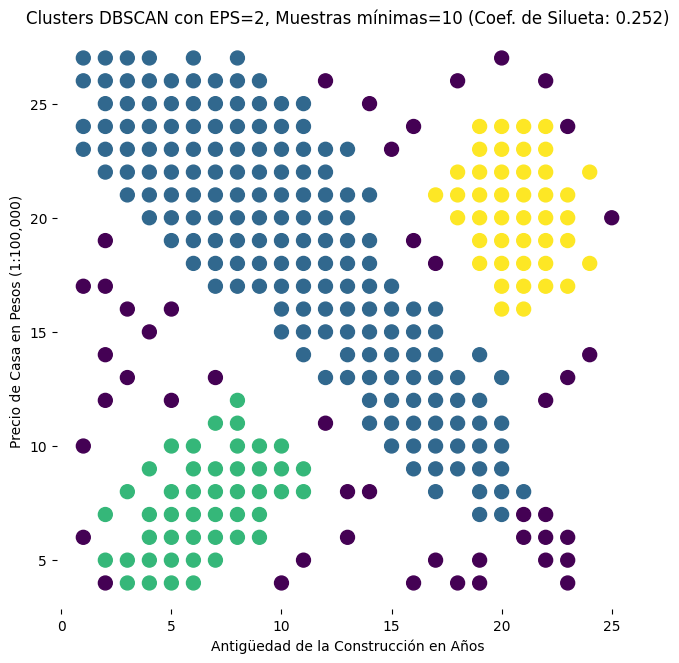

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Cargar datos
datos = np.loadtxt("https://raw.githubusercontent.com/CodigoMaquina/code/main/datos/casas.csv", delimiter=",")

# Identificar Clusters
clusters = DBSCAN(eps=2, min_samples=10).fit_predict(datos)
print(clusters)

# Solo calcular el coeficiente de silueta si hay más de 1 cluster y menos que el total de puntos
if 1 < n_clusters_ < len(datos):
    silhouette_avg = silhouette_score(datos, labels)
    print(f"El coeficiente de silueta para los clusters identificados es: {silhouette_avg:.3f}")
else:
    print("No se puede calcular el coeficiente de silueta con un solo cluster o solo ruido.")

# Gráfica de matplotlib para mostrar los Clusters
plt.figure(figsize=(7.5, 7.5))
plt.scatter(datos[:, 0], datos[:, 1], c=clusters, s=100)
plt.title(f'Clusters DBSCAN con EPS=2, Muestras mínimas=10 (Coef. de Silueta: {silhouette_avg:.3f})' if 1 < n_clusters_ < len(datos) else 'Clusters DBSCAN con EPS=2, Muestras mínimas=10')
plt.xlabel("Antigüedad de la Construcción en Años")
plt.ylabel("Precio de Casa en Pesos (1:100,000)")
plt.box(False)
plt.show()

## Ejercicio # 2

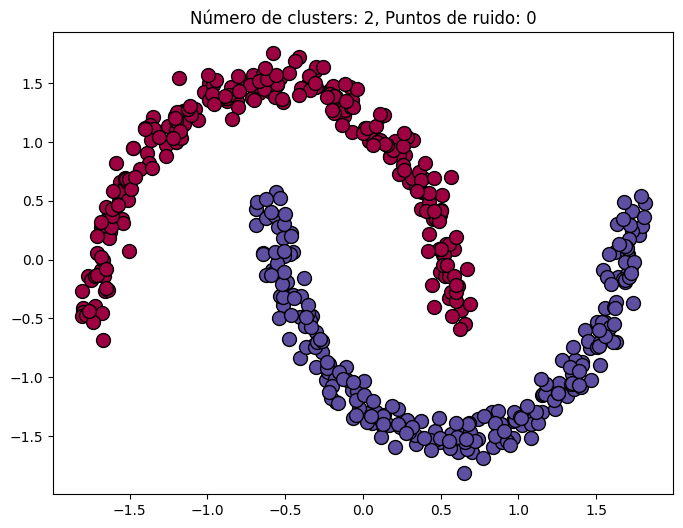

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Generar un conjunto de datos de ejemplo (dos lunas)
X, _ = make_moons(n_samples=500, noise=0.05, random_state=0)

# Escalar los datos
X_scaled = StandardScaler().fit_transform(X)

# Aplicar DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X_scaled)

# Identificar puntos centrales y puntos de ruido
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

# Graficar los resultados
plt.figure(figsize=(8, 6))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Color negro para ruido

    class_member_mask = (labels == k)

    # Graficar los puntos centrales del cluster
    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

    # Graficar los puntos de borde del cluster
    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=5)

plt.title('Número de clusters: %d, Puntos de ruido: %d' % (n_clusters, n_noise))
plt.show()


# **Coeficiente Silueta**

La métrica de silueta es un método de interpretación y validación de consistencia interna de los datos en un análisis de clustering. Proporciona una medida de qué tan bien cada objeto ha sido clasificado.

El coeficiente de silueta es una medida de cuán similar es un objeto a su propio cluster (cohesión) en comparación con otros clusters (separación). El coeficiente toma valores entre -1 y 1, donde:

- Un valor cercano a +1 indica que el objeto está bien emparejado con su propio cluster y mal emparejado con los clusters vecinos. Si la mayoría de los objetos tienen un valor alto, entonces la configuración de clustering es apropiada.
- Un valor de 0 indica que el objeto está en la frontera entre dos clusters.
- Un valor cercano a -1 indica que el objeto está mal emparejado con su propio cluster y debería haber sido clasificado en un cluster vecino.

Para interpretar estos valores en un análisis de clustering:

1. **Valores Altos**: Significan que el objeto se encuentra bien dentro de su cluster, con una alta cohesión y una buena separación de otros clusters.
2. **Valores Bajos o Negativos**: Indican que el objeto podría pertenecer a otro cluster, hay solapamiento entre clusters o los clusters están dispersos y no bien definidos.
3. **Valores Cercanos a Cero**: Significan que el objeto está cerca del límite de decisión entre dos clusters vecinos.

### Cómputo del Coeficiente Silueta para un punto de datos en clustering:

1. **Calcula la cohesión (a)**: Mide qué tan bien se ajusta un punto al cluster al que ha sido asignado. Se calcula como el promedio de la distancia (que puede ser distancia euclidiana, manhattan, etc., dependiendo de la métrica utilizada) entre el punto y todos los otros puntos en el mismo cluster.

2. **Calcula la separación (b)**: Determina qué tan bien se separa un punto de su cluster más cercano al que no pertenece. Se calcula como el promedio de la distancia entre el punto y todos los puntos en el cluster más cercano diferente del suyo.

3. **Computa el coeficiente de silueta (s)**: Para cada punto, el coeficiente de silueta se calcula utilizando la cohesión y la separación con la siguiente fórmula:

   \[ s = \frac{b - a}{\max(a, b)} \]

   Donde:
   - \( a \) es la distancia media del punto a los otros puntos en el mismo cluster (cohesión).
   - \( b \) es la distancia media del punto a los puntos en el cluster vecino más cercano (separación).

El coeficiente de silueta varía de -1 a 1. Si es cercano a 1, indica que el punto está bien emparejado con su propio cluster y lejos de los otros clusters. Si el coeficiente es cercano a 0, indica que el punto está cerca de la frontera de decisión entre dos clusters vecinos. Si el coeficiente es cercano a -1, sugiere que el punto ha sido asignado al cluster equivocado.

Para evaluar la calidad del clustering en su conjunto, se promedian los coeficientes de silueta de todos los puntos. Un valor promedio cercano a 1 sugiere un buen clustering, mientras que un valor cercano a 0 o negativo puede indicar un ajuste deficiente.